In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [3]:
avg_scale_analyse = pd.read_csv('scale_analysis_cross_entropy.csv', index_col=0).iloc[:3, :5].astype(float)
avg_scale_analyse

,33%,50%,66%,83%,100%
nnUNet 3D/160x128x32 (CLIP Pre-&Post-IVL),0.108117,0.071680,0.056225,0.088623,0.052512
nnUNet 3D/160x128x32 (LaW OCT),0.082145,0.069594,0.059133,0.074541,0.049158
nnUNet 3D/160x128x32,0.106661,0.106374,0.060031,0.089518,0.054706


In [4]:
std_scale_analyse = pd.read_csv('scale_analysis_cross_entropy.csv', index_col=0).iloc[5:8, :5].astype(float)
std_scale_analyse

,33%,50%,66%,83%,100%
nnUNet 3D/160x128x32 (CLIP Pre-&Post-IVL),0.016343,0.016424,0.005523,0.026031,0.005729
nnUNet 3D/160x128x32 (LaW OCT),0.007561,0.012088,0.006477,0.023227,0.000226
nnUNet 3D/160x128x32,0.012283,0.046694,0.010394,0.024256,0.004554


In [5]:
avg_scale_analyse.iloc[0, :]

33%     0.108117
50%     0.071680
66%     0.056225
83%     0.088623
100%    0.052512
Name: nnUNet 3D/160x128x32 (CLIP Pre-&Post-IVL), dtype: float64

In [6]:
std_scale_analyse.iloc[0, :].to_numpy()

array([0.01634341, 0.0164243 , 0.00552259, 0.02603092, 0.00572865])

In [7]:
cmap = mpl.colormaps['twilight_shifted']

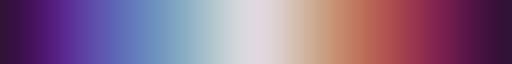

In [8]:
cmap

In [16]:
moving_avg

33%     0.106661
50%     0.106517
66%     0.091022
83%     0.090646
100%    0.083458
Name: nnUNet 3D/160x128x32, dtype: float64

In [19]:
data, 
(0.106661 + 0.106374 + 0.060031) / 3

0.091022

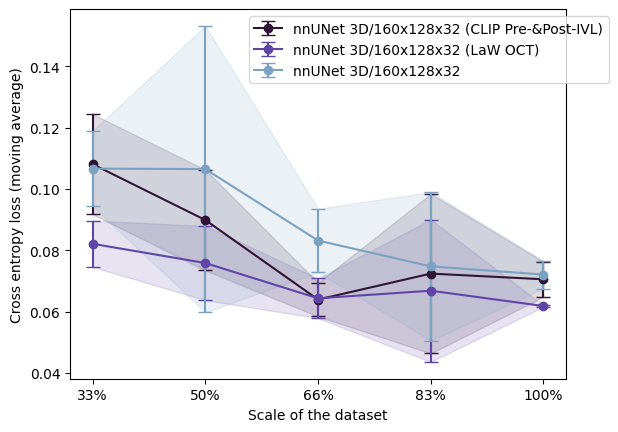

In [22]:
fig, ax = plt.subplots()

colors = [cmap(i) for i in range(0, 255, 255//len(avg_scale_analyse))]
alpha = 0.15

for i in range(len(avg_scale_analyse)):
    data = avg_scale_analyse.iloc[i, :]
    moving_avg = data.rolling(min_periods=1, window=2).mean()

    ax.errorbar(avg_scale_analyse.columns, moving_avg, yerr=std_scale_analyse.iloc[i, :], label=avg_scale_analyse.iloc[i, :].name, marker='o', capsize=5, color=colors[i])
    ax.fill_between(avg_scale_analyse.columns, moving_avg - std_scale_analyse.iloc[i, :], moving_avg + std_scale_analyse.iloc[i, :], alpha=alpha, color=colors[i])

ax.set_xlabel('Scale of the dataset')
ax.set_ylabel('Cross entropy loss (moving average)')

ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

fig.savefig('discussion_cross_entropy_scale_analysis.png', dpi=1000, bbox_inches='tight')
plt.show()